HİSSİYAT ANALİZİ

In [7]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [8]:
import os
os.chdir('/gdrive/My Drive/Dogal_Dil_Isleme/')

In [9]:
!ls

data			kelime_bulutu.png  Sentiment_Analysis.ipynb
Hissiyat_Analizi.ipynb	LDA.ipynb


In [10]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
import pandas as pd 
data = pd.read_csv("data/train.tsv",sep = "\t")

In [12]:
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


Dönüştürme İşlemleri

In [14]:
#buyuk-kucuk donusumu
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
#noktalama işaretleri
data['Phrase'] = data['Phrase'].str.replace('[^\w\s]','')

In [16]:
#sayılar
data['Phrase'] = data['Phrase'].str.replace('\d','')

In [17]:
#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#seyreklerin silinmesi
sil = pd.Series(' '.join(data['Phrase']).split()).value_counts()[-1000:]
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [19]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
#lemminization
from textblob import Word
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [21]:
data['Phrase'].head(10)

0    series demonstrating adage good goose also goo...
1                series demonstrating adage good goose
2                                               series
3                                                     
4                                               series
5                       demonstrating adage good goose
6                                                     
7                       demonstrating adage good goose
8                                                     
9                       demonstrating adage good goose
Name: Phrase, dtype: object

Worldcloud

In [22]:
!pip install wordcloud

In [23]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [24]:
text = data["Phrase"][0]

In [25]:
wordcloud = WordCloud().generate(text)

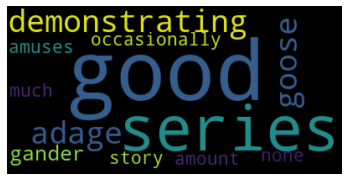

In [26]:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

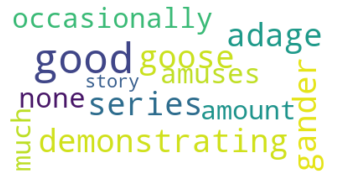

In [27]:
wordcloud = WordCloud(max_font_size = 50,
                     max_words = 100, 
                     background_color = "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [28]:
wordcloud.to_file("kelime_bulutu.png");

In [29]:
#Tüm Metin
text = " ".join(i for i in data.Phrase)
text

Output hidden; open in https://colab.research.google.com to view.

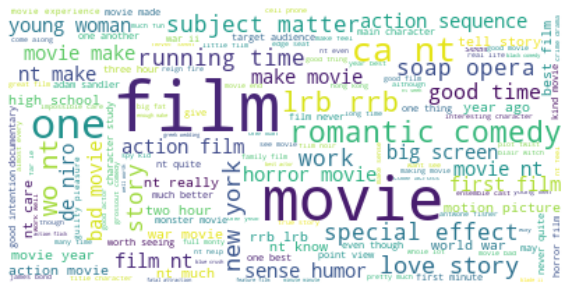

In [30]:
wordcloud = WordCloud(max_font_size = 50, 
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Şablonlara Göre World Cloud

In [31]:
vbo_mask = np.array(Image.open("data/tr.png"))
vbo_mask

array([[[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]],

       [[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]],

       [[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]],

       ...,

       [[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]],

       [[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]],

       [[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]]

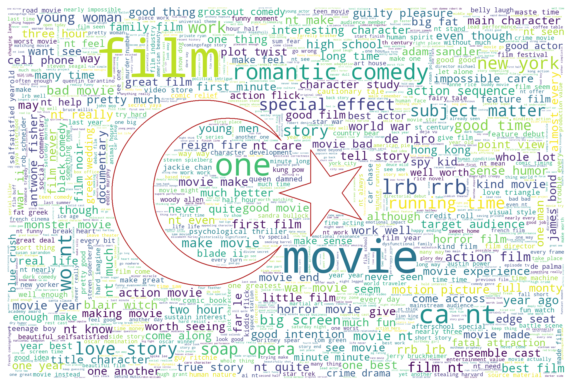

In [32]:
wc = WordCloud(background_color = "white",
                     max_words = 1000, 
                     mask = vbo_mask, 
                     contour_width = 3,
                     contour_color = "firebrick")

wc.generate(text)

wc.to_file("data/vbo.png")

plt.figure(figsize = [10,10])
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()